# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [8]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | BA, after subsequent delays ..."
1,Not Verified | It is embarrassing to have th...
2,✅ Trip Verified | Flight cancelled due to bad ...
3,✅ Trip Verified | British Airways oversold my...
4,✅ Trip Verified | I travelled London to Doha ...


In [10]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Data Preprocessing

In [15]:
df = pd.read_csv("data/BA_reviews.csv")

In [17]:
df.head(10)

,Unnamed: 0,reviews
0,0,"✅ Trip Verified | BA, after subsequent delays ..."
1,1,Not Verified | It is embarrassing to have th...
2,2,✅ Trip Verified | Flight cancelled due to bad ...
3,3,✅ Trip Verified | British Airways oversold my...
4,4,✅ Trip Verified | I travelled London to Doha ...
5,5,✅ Trip Verified | When dropping off my luggag...
6,6,✅ Trip Verified | If you can’t fly First Class...
7,7,Not Verified | Singapore to Heathrow. Busine...
8,8,Not Verified | I reported my damaged/ruined ...
9,9,"Not Verified | On March 1st, I flew from Ber..."


In [19]:
df = df.drop(columns=['Unnamed: 0'])

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
None


In [75]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure required resources are downloaded
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

# Load your CSV file into a DataFrame
# df = pd.read_csv('data/BA_reviews.csv')

# Define preprocessing functions
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def to_lowercase(text):
    return text.lower()

def tokenize(text):
    return word_tokenize(text)

# Define custom stopwords
custom_stopwords = {'flight', 'ba', 'verified', 'trip', '✅', 'airline', 'british', 'airway',
                   'one', 'u', 'get', 'would', 'back'}

# Get the default stopwords set from NLTK
stop_words = set(stopwords.words('english'))

# Add custom stopwords to the default stopwords set
stop_words.update(custom_stopwords)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

def preprocess_text(text):
    text = remove_punctuation(text)
    text = to_lowercase(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_words(tokens)
    return ' '.join(tokens)

# Apply preprocessing to the review column
df['cleaned_text'] = df['reviews'].apply(preprocess_text)

# Display the cleaned DataFrame
print(df['cleaned_text'])


0      subsequent delay postponed departure time init...
1      embarrassing word “ ” attached service substan...
2      cancelled due bad weather contacted email imme...
3      airway oversold lhr lax booked month advance p...
4      travelled london doha july 16th physically che...
                             ...                        
995    delayed almost two hour nice gave u boeing 747...
996    checked newcastle check process disgusting 45 ...
997    gatwick madrid arrived waited half hour suitca...
998    boyfriend wanted return london day early app w...
999    kept laptop bag overhead cabin somebody got bi...
Name: cleaned_text, Length: 1000, dtype: object


In [77]:
df['cleaned_text'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: cleaned_text
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [97]:
# Most common words
from collections import Counter

# If 'cleaned_text' contains strings of preprocessed text
all_words = [word for text in df['cleaned_text'] for word in word_tokenize(text)]
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(30)
print(f'Most common words: {most_common_words}')

Most common words: [('seat', 837), ('service', 768), ('time', 658), ('’', 616), ('hour', 602), ('london', 504), ('class', 453), ('crew', 452), ('food', 432), ('airway', 430), ('u', 418), ('good', 414), ('business', 413), ('staff', 400), ('cabin', 383), ('customer', 368), ('day', 338), ('passenger', 314), ('heathrow', 308), ('flight', 284), ('even', 283), ('told', 280), ('airport', 276), ('could', 275), ('check', 272), ('bag', 271), ('experience', 269), ('plane', 264), ('boarding', 260), ('first', 257)]


In [85]:
# Count reviews
total_reviews = len(df)
print(f'Total number of reviews: {total_reviews}')

Total number of reviews: 1000


In [95]:
# !pip install textblob

In [109]:
# Sentiment score of every review
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
df['sentiment']

0     -0.035746
1      0.090000
2     -0.006250
3      0.098000
4      0.040377
         ...   
995    0.244286
996   -0.043571
997    0.016667
998   -0.011667
999    0.264286
Name: sentiment, Length: 1000, dtype: float64

In [271]:
# Count of Reviews

# Positive
positive_reviews = (df['sentiment'] > 0).sum()
print(f"Percentage of Positive Reviews : {(positive_reviews/1000*100)}")

# Negative
negative_reviews = (df['sentiment'] < 0).sum()
print(f"Percentage of Negative Reviews : {(negative_reviews/1000*100)}")

# Neutral
neutral_reviews = (df['sentiment'] == 0).sum()
print(f"Percentage of Neutral Reviews : {(neutral_reviews/1000*100)}")

Percentage of Positive Reviews : 62.5
Percentage of Negative Reviews : 36.1
Percentage of Neutral Reviews : 1.4000000000000001


In [111]:
# Average Sentiment score of all the reviews
avg_sentiment_score = df['sentiment'].mean()

print(f"Average sentiment score: {avg_sentiment_score}")

Average sentiment score: 0.06403023161776085


In [117]:
df

,reviews,cleaned_text,sentiment
0,"✅ Trip Verified | BA, after subsequent delays ...",subsequent delay postponed departure time init...,-0.035746
1,Not Verified | It is embarrassing to have th...,embarrassing word “ ” attached service substan...,0.090000
2,✅ Trip Verified | Flight cancelled due to bad ...,cancelled due bad weather contacted email imme...,-0.006250
3,✅ Trip Verified | British Airways oversold my...,airway oversold lhr lax booked month advance p...,0.098000
4,✅ Trip Verified | I travelled London to Doha ...,travelled london doha july 16th physically che...,0.040377
...,...,...,...
995,✅ Trip Verified | Flight was delayed by almos...,delayed almost two hour nice gave u boeing 747...,0.244286
996,✅ Trip Verified | Just checked in for a flight...,checked newcastle check process disgusting 45 ...,-0.043571
997,✅ Trip Verified | Gatwick to Madrid. When I a...,gatwick madrid arrived waited half hour suitca...,0.016667
998,✅ Trip Verified | My boyfriend and I wanted t...,boyfriend wanted return london day early app w...,-0.011667


### Histogram of Sentiment Analysis

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


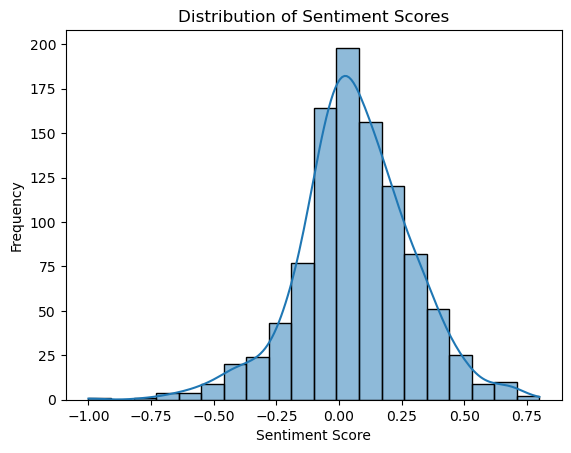

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the sentiment analysis results
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.savefig('seaborn_histplot.png', format='png', dpi=300)
plt.show()

### Topic Modelling

In [128]:
# !pip install gensim

In [136]:
# Importing Gensim
import gensim
from gensim import corpora
from gensim.models import LdaModel

# Tokenize the cleaned text
texts = df['cleaned_text'].apply(nltk.word_tokenize)

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Create a corpus: list of bag-of-words vectors
corpus = [dictionary.doc2bow(text) for text in texts]

In [138]:
# Build the LDA model

# Define the number of topics
num_topics = 5

# Create the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

In [139]:
# Print the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.019*"seat" + 0.012*"food" + 0.012*"class" + 0.012*"good" + 0.011*"time" + 0.010*"service" + 0.010*"business" + 0.009*"crew" + 0.007*"cabin" + 0.006*"london"')
(1, '0.010*"bag" + 0.010*"service" + 0.009*"customer" + 0.007*"london" + 0.005*"’" + 0.005*"u" + 0.005*"time" + 0.005*"passenger" + 0.005*"make" + 0.004*"heathrow"')
(2, '0.012*"hour" + 0.010*"’" + 0.009*"time" + 0.009*"u" + 0.009*"service" + 0.008*"airway" + 0.008*"day" + 0.007*"customer" + 0.007*"london" + 0.007*"told"')
(3, '0.014*"seat" + 0.011*"crew" + 0.010*"’" + 0.010*"cabin" + 0.010*"service" + 0.009*"meal" + 0.008*"passenger" + 0.007*"economy" + 0.007*"good" + 0.007*"class"')
(4, '0.011*"seat" + 0.008*"service" + 0.005*"staff" + 0.005*"airway" + 0.005*"said" + 0.005*"attendant" + 0.005*"customer" + 0.005*"u" + 0.004*"could" + 0.004*"check"')


In [148]:
# !pip install pyLDAvis

In [152]:
# Visualising the topics using pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

### Generating word cloud

In [ ]:
# !pip install wordcloud

In [154]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [156]:
text = ' '.join(df['cleaned_text'].dropna().astype(str))

In [216]:
ba_logo_mask = np.array(Image.open('British_Airways_(6).png'))

In [218]:
ba_logo_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [220]:
def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val

In [222]:
maskable_image = np.ndarray((ba_logo_mask.shape[0],ba_logo_mask.shape[1]), np.int32)

In [224]:
for i in range(len(ba_logo_mask)):
    maskable_image[i] = list(map(transform_zeros, ba_logo_mask[i]))

maskable_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

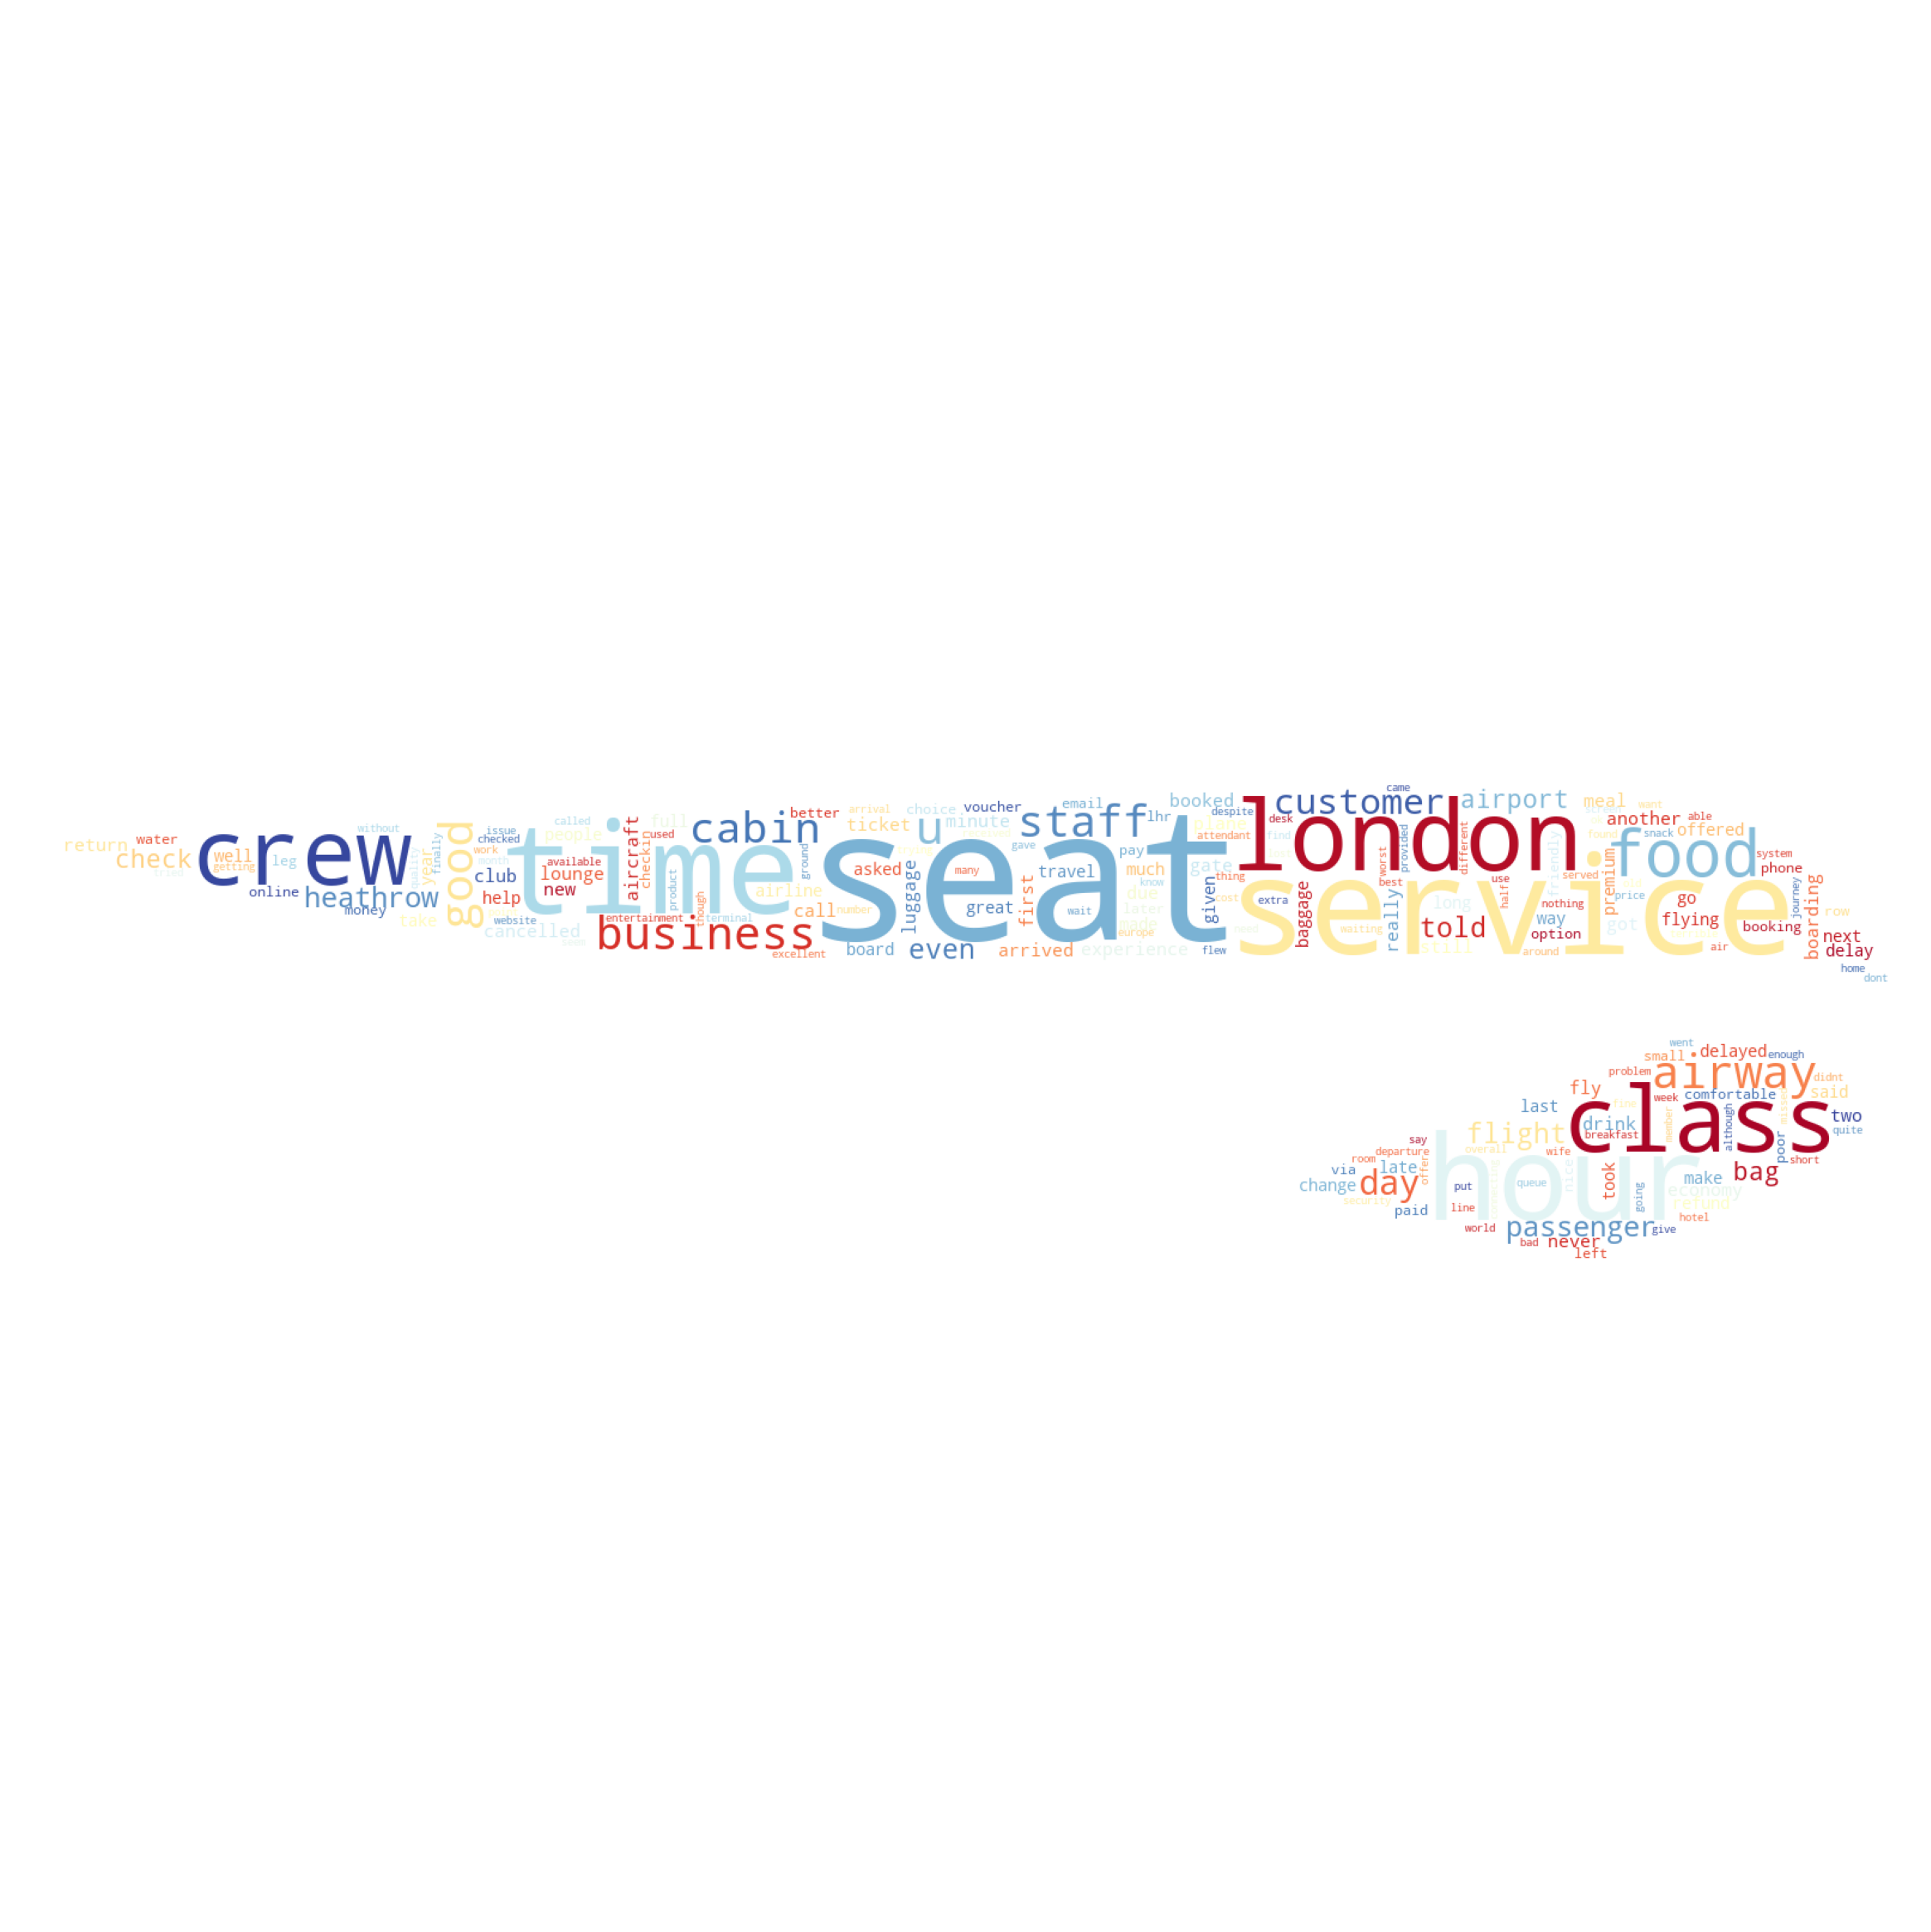

In [245]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='white', colormap='RdYlBu', collocations=False,
                    mask=maskable_image).generate(text)

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
plot_cloud(wordcloud)